_Lambda School Data Science_
# Choose appropriate visualizations

# Upgrade Seaborn

Make sure you have at least version 0.9.0

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /home/schmatthew/anaconda3/lib/python3.7/site-packages (0.9.0)
Requirement not upgraded as not directly required: scipy>=0.14.0 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from seaborn) (1.1.0)
Requirement not upgraded as not directly required: matplotlib>=1.4.3 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from seaborn) (2.2.3)
Requirement not upgraded as not directly required: pandas>=0.15.2 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from seaborn) (0.23.4)
Requirement not upgraded as not directly required: numpy>=1.9.3 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from seaborn) (1.15.1)
Requirement not upgraded as not directly required: cycler>=0.10 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from matplotlib>=1.4.3->seaborn) (0.10.0)
Requirement not upgraded as not directly required: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /home/schmatthew/anaconda3/lib/python3.7/sit

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2018-11-13 11:58:55--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py.1’

misleading.py.1     100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 11:58:55 (188 MB/s) - ‘misleading.py.1’ saved [1641/1641]



#### Fix misleading plot #1

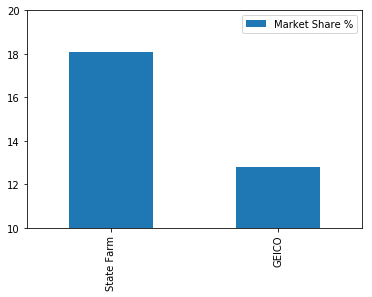

In [5]:
misleading.plot1()

#### Fix misleading plot #2

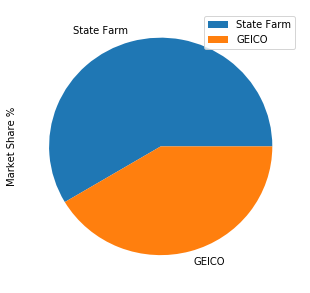

In [6]:
misleading.plot2()

#### Fix misleading plot #3

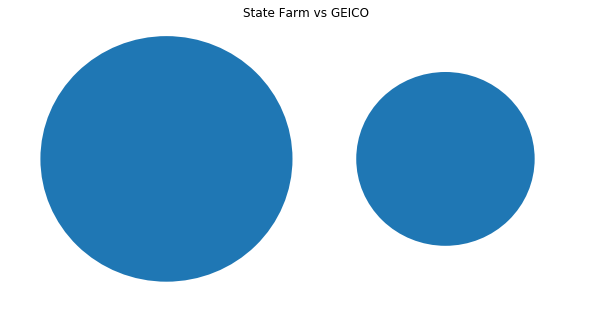

In [7]:
misleading.plot3()

#### Fix misleading plot #4

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [11]:
import altair as alt
alt.renderers.enable('notebook')

ModuleNotFoundError: No module named 'altair'

In [9]:
misleading.plot4()

ModuleNotFoundError: No module named 'altair'

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Where to Start and End Your Y-Axis Scale](http://stephanieevergreen.com/y-axis/)
- [xkcd heatmap](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [12]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [18]:
df.shape

(44, 3)

### See the data

In [17]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [23]:
groups = df.groupby(['dataset'])

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [22]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [24]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [25]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [28]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [29]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

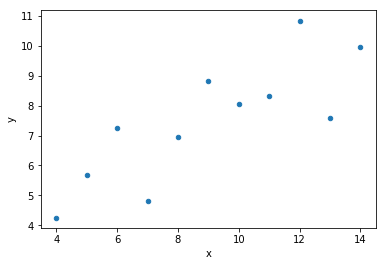

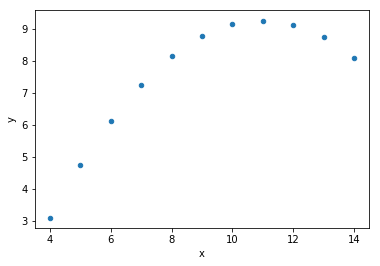

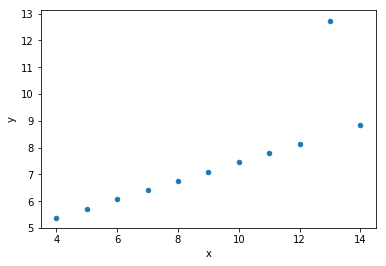

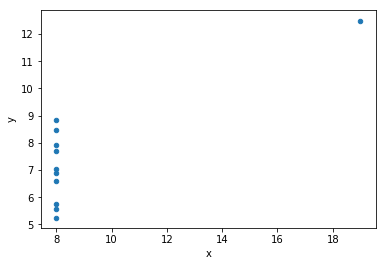

In [33]:
groups.plot(x = 'x', y = 'y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

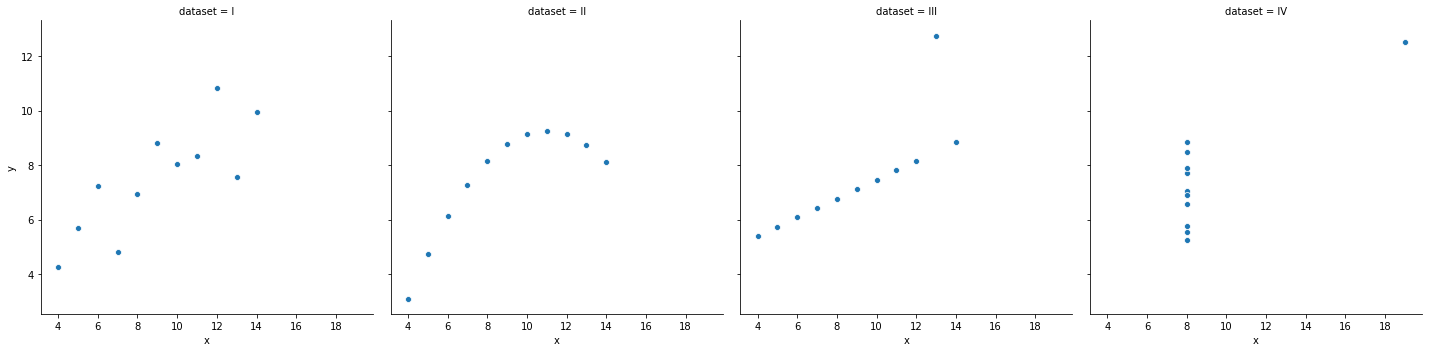

In [38]:
import seaborn as sns

sns.relplot('x', 'y', col='dataset', data=df);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

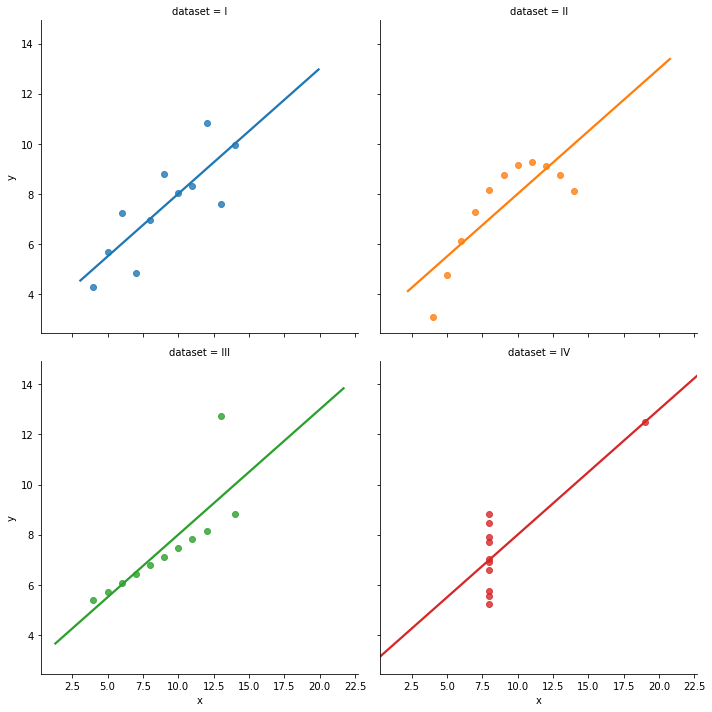

In [47]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', ci=None, col_wrap=2, data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [57]:
import numpy as np
tips = sns.load_dataset('tips')

### See the data's shape

In [60]:
tips.shape

(244, 7)

### See the first 5 rows

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [62]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [64]:
tips.describe(exclude = [np.number])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

/home/schmatthew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


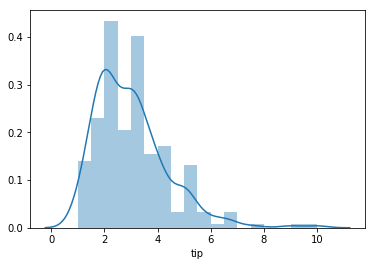

In [66]:
sns.distplot(tips.tip);

/home/schmatthew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


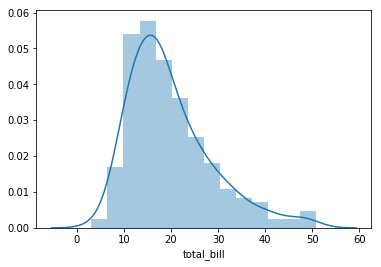

In [69]:
sns.distplot(tips.total_bill);

In [71]:
tips['percent'] = tips.tip / tips.total_bill

/home/schmatthew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


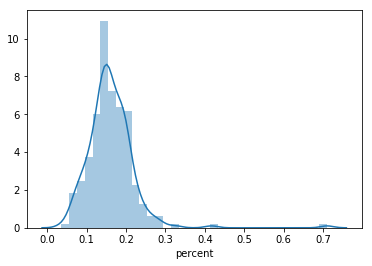

In [73]:
sns.distplot(tips.percent);

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

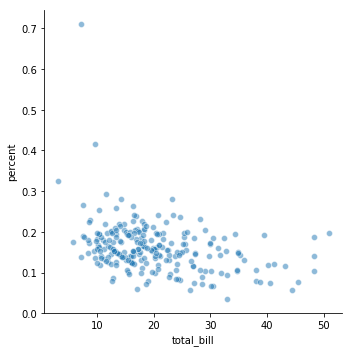

In [76]:
sns.relplot('total_bill', 'percent',  data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

## 3. Flights

### Load dataset

In [ ]:
flights = sns.load_dataset('flights')

### See the data's shape

### See the first 5 rows

### Describe the data

### Plot year & passengers

### Plot month & passengers

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)